In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Retrieve data from Finance Yahoo

In [18]:
# Define stock symbol (Google in this case)
stock_symbol = "GOOGL"

# Retrieve data from Finance Yahoo
data = pd.read_csv('GOOG.csv', index_col='Date')
data = data[['Close']]

# Add a date column to the data
data['Date'] = data.index

# Create columns for feature variables (closing prices of the last 10 days)

In [19]:

for i in range(1, 11):
    data[f'Close_{i}d'] = data['Close'].shift(i)

# Split the data into training and testing sets

In [20]:
# Drop rows with NaN values
data = data.dropna()


train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Select feature variables and the dependent variable

In [21]:

X_train, y_train = train.iloc[:, 2:], train['Close']
X_test, y_test = test.iloc[:, 2:], test['Close']

# Perform Linear Regression

In [22]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Perform Support Vector Regression (SVM) with a linear kernel

In [23]:

svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Perform Support Vector Regression (SVR) with an RBF kernel

In [24]:

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Calculate MAE and MSE for each model

In [25]:

lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)

svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

# Display the results

In [26]:

print("Linear Regression:")
print(f"MAE: {lr_mae}")
print(f"MSE: {lr_mse}\n")

print("Support Vector Regression (Linear Kernel):")
print(f"MAE: {svm_mae}")
print(f"MSE: {svm_mse}\n")

print("Support Vector Regression (RBF Kernel):")
print(f"MAE: {svr_mae}")
print(f"MSE: {svr_mse}")

Linear Regression:
MAE: 1.7535939392403084
MSE: 7.158126769992798

Support Vector Regression (Linear Kernel):
MAE: 1.7747306568271244
MSE: 7.491837841822067

Support Vector Regression (RBF Kernel):
MAE: 3.7265628115182365
MSE: 19.440796336981197


# Display the plot

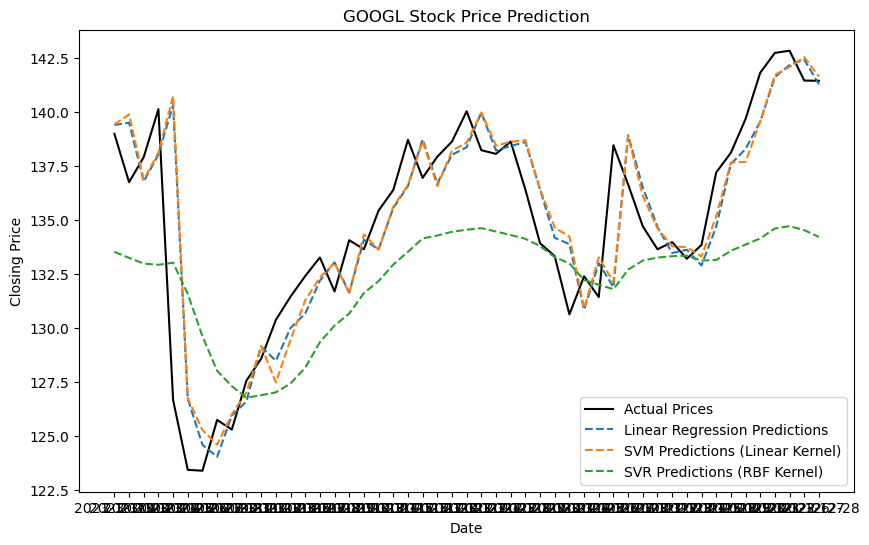

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], y_test, label='Actual Prices', color='black')
plt.plot(test['Date'], lr_predictions, label='Linear Regression Predictions', linestyle='dashed')
plt.plot(test['Date'], svm_predictions, label='SVM Predictions (Linear Kernel)', linestyle='dashed')
plt.plot(test['Date'], svr_predictions, label='SVR Predictions (RBF Kernel)', linestyle='dashed')
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()
